In [8]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import time
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf

In [9]:
df = pd.read_csv("landmark2.csv",on_bad_lines='skip')
X = df.drop(df.columns[0], axis = 1)
y = df[df.columns[0]]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

len(y_train.unique())

#y_train=keras.utils.to_categorical(y_train,27)
#y_test=keras.utils.to_categorical(y_test)

27

In [7]:
print("X_train shape" +  str(X_train.shape))
print("y_train shape" +  str(y_train.shape))
print("X_test shape" +  str(X_test.shape))
print("y_test shape" +  str(y_test.shape))

X_train shape(46196, 63)
y_train shape(46196,)
X_test shape(15399, 63)
y_test shape(15399,)


## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier()

reg = model.fit(X_train,y_train)
stop1 = time.time()

Y_pred = model.predict(X_test)
stop2 = time.time()
apprentissage_RFC = round(stop1-start,3)
prediction_RFC = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_RFC} s")
print(f"Temps d'apprentissage+prediction : {prediction_RFC} s")

Temps d'apprentissage : 52.045 s
Temps d'apprentissage+prediction : 52.765 s


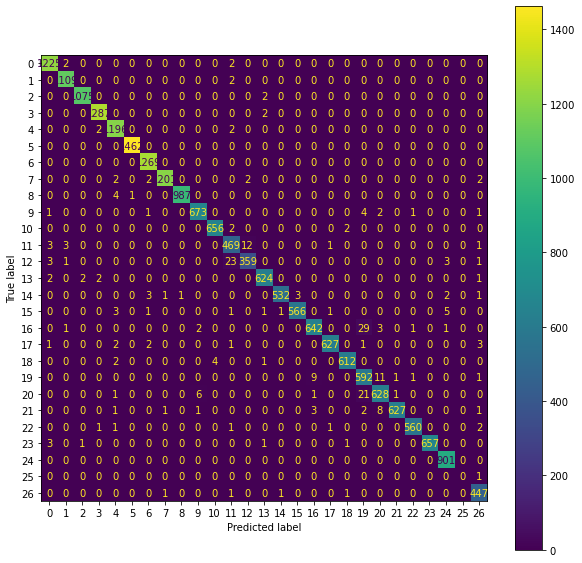

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       0.99      1.00      0.99      1229
           B       0.99      1.00      1.00      1111
           C       1.00      1.00      1.00      1077
           D       1.00      1.00      1.00      1289
           E       0.99      1.00      0.99      1200
           F       1.00      1.00      1.00      1462
           G       0.99      1.00      1.00      1269
           H       1.00      0.99      1.00      1209
           I       1.00      0.99      1.00       992
           K       0.99      0.99      0.99       683
           L       0.99      0.99      0.99       660
           M       0.93      0.96      0.94       489
           N       0.96      0.92      0.94       390
           O       0.99      0.99      0.99       631
           P       1.00      0.98      0.99       543
           Q       0.99      0.98      0.99       579
           R       0.98      0.95      0.96       679
           S       1.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ASL

In [11]:
from keras.layers import Conv2D,Flatten,MaxPool2D,BatchNormalization,Activation,Dropout
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [12]:
print("X_train shape" +  str(X_train.shape))
print("y_train shape" +  str(y_train.shape))
print("X_test shape" +  str(X_test.shape))
print("y_test shape" +  str(y_test.shape))

X_train shape(46196, 63)
y_train shape(46196,)
X_test shape(15399, 63)
y_test shape(15399,)


In [13]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=63, input_shape=[63]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=27, activation='softmax')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 63)                4032      
                                                                 
 dropout (Dropout)           (None, 63)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8192      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 512)               131584    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

In [14]:
model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [15]:
y_train_encoded = pd.get_dummies(y_train, prefix='target')
y_test_encoded = pd.get_dummies(y_test, prefix='target')
y_train_encoded.head(3)

,target_A,target_B,target_C,target_D,target_E,target_F,target_G,target_H,target_I,target_K,...,target_S,target_T,target_U,target_V,target_W,target_X,target_Y,target_d,target_n,target_s
39877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5907,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

In [18]:
history = model1.fit(
    X_train,
    y_train_encoded,
    validation_split =0.2,
    epochs=25,
    callbacks=[early_stop]
)

Epoch 1/25
1155/1155 [==============================] - 9s 8ms/step - loss: 0.1415 - accuracy: 0.9584 - val_loss: 0.1020 - val_accuracy: 0.9761
Epoch 2/25
1155/1155 [==============================] - 9s 8ms/step - loss: 0.1371 - accuracy: 0.9621 - val_loss: 0.0894 - val_accuracy: 0.9749
Epoch 3/25
1155/1155 [==============================] - 10s 8ms/step - loss: 0.1304 - accuracy: 0.9633 - val_loss: 0.0968 - val_accuracy: 0.9739
Epoch 4/25
1155/1155 [==============================] - 9s 8ms/step - loss: 0.1286 - accuracy: 0.9630 - val_loss: 0.0744 - val_accuracy: 0.9793
Epoch 5/25
1155/1155 [==============================] - 10s 9ms/step - loss: 0.1234 - accuracy: 0.9653 - val_loss: 0.0904 - val_accuracy: 0.9758
Epoch 6/25
1155/1155 [==============================] - 9s 8ms/step - loss: 0.1262 - accuracy: 0.9640 - val_loss: 0.2174 - val_accuracy: 0.9389
Epoch 7/25
1155/1155 [==============================] - 10s 9ms/step - loss: 0.1326 - accuracy: 0.9609 - val_loss: 0.0883 - val_accura

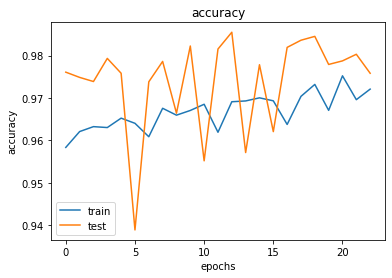

In [20]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train","test"])

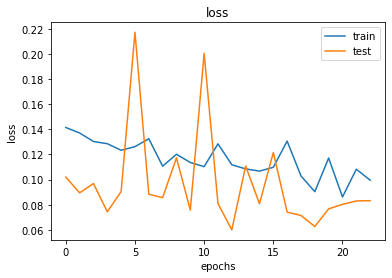

In [21]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train","test"])

In [146]:
y_pred = model1.predict(X_test)
print(y_pred.shape)

alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


y_pred_value = np.argmax(y_pred, axis=1)
print(y_pred_value)
y_pred_value = pd.DataFrame(y_pred_value)

#for y in y_pred_value :
#    for idl, l in enumerate(alphabets): 
#        if y_pred_value[y] == idl :
#            y_pred_value[y]=l
#
#
#print(y_pred_value)
#print(y_test)



for idl, l in enumerate(alphabets):
    print(idl, l)
    for y in y_pred_value :
        print(y)
        if y_pred_value[y] == idl :
            y_pred_value[y]=l

482/482 [==============================] - 1s 2ms/step
(15399, 27)
[14 19 10 ... 14  7  0]
        0
0      14
1      19
2      10
3      17
4      24
...    ..
15394  15
15395   5
15396  14
15397   7
15398   0

[15399 rows x 1 columns]
0 A
0


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [59]:
print(y_test_cm.shape, y_pred_cm.shape)
print(y_pred_cm)


(15399,) (15399,)
[14 19 10 ... 14  7  0]


In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_cm,y_pred_cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)

ValueError: Mix of label input types (string and number)